# Module 5: Decision tree and Random Forrest

##**Scenario:** Predict Employee Attrition using Classification Algorithms




Employee retention is one of the biggest metrics that a company should have in mind when thinking of growth. Employee attrition is caused when the total strength of the company is greatly reduced as more employees leave the company than expected.

So, what is **Attrition**?
It is basically the turnover rate of employees in a particular organization

Reasons for **Attrition**:

- Employees looking for better opportunities
- A negative working environment
- Bad management
- Sickness of an employee
- Excessive working hours

###**Problem Statement**
Uncover the factors that lead to employee attrition and explore the reasons as to why people are leaving the organization and predict whether an employee will leave the organization or not by creating a Web App using Streamlit that takes inputs from user's online





###**Dataset Description**
The data set contains the following attributes:

- **satisfaction_level**
- **last_evaluation**
- **number_project**
- **average_montly_hours**
- **time_spend_company**
- **Work_accident**
- **quit**
- **promotion_last_5years**
- **department**
- **salary**

###**Installing Dependencies**

**Note:** After Insalling Pandas Profiling, restart the kernel and run from the top excluding the installation cell

- It's better to install all th libraries at the top

In [56]:
#Intalling Pandas-Profiling

!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached visions-0.4.1-py3-none-any.whl (58 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.3.0 requires visions[type_image_path]==0.7.5, but you have visions 0.4.1 which is incompatible.


In [57]:
# Installing SHAP
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
#Installing PyCaret

!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###**Importing Required Libraries & Loading the Dataset**




[**Click Here**](https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv?dl=0) to download the dataset

In [59]:
#Please run this cell in Google Colab to download the dataset

!wget https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv

--2023-06-21 06:52:45--  https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/d18ektpwkx91khj/employee_data.csv [following]
--2023-06-21 06:52:46--  https://www.dropbox.com/s/raw/d18ektpwkx91khj/employee_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce507f0c24fc2c81ac36efa1e49.dl.dropboxusercontent.com/cd/0/inline/B-Y1Ah6GTlxo1IcznHbDW2MSlHAzatAqZ7T19cf6AWd2SdEaya1AZ9jJwBwjq1y3afW55DrURKjqby8vX4loFexRVJmYKUzxv0BmAfmF0YJ2HZyzmMyBOyppDVv4LZ5r9ItropxUmznuiCtZ99Vs7cfNZv0fgMyqFtVMZ80Fc_GDog/file# [following]
--2023-06-21 06:52:46--  https://uce507f0c24fc2c81ac36efa1e49.dl.dropboxusercontent.com/cd/0/inline/B-Y1Ah6GTlxo1IcznHbDW2MSlHAzatAqZ7T19cf6AWd2SdEaya1AZ9jJwBwjq1

In [60]:
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.7.1 requires visions[type_image_path]==0.4.1, but you have visions 0.7.5 which is incompatible.


In [61]:
  #Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
sns.set()


import warnings
warnings.filterwarnings("ignore")
import os

print('Libraries Imported')

Libraries Imported


In [62]:
#Loading the dataset

df = pd.read_csv('/content/employee_data.csv')

df.head() #Printing the first 5 rows of dataframe

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

###**Exploratory Data Analysis**

**Note:** If you want to learn more about Pandas-Profiling [**Click Here!**](https://pypi.org/project/pandas-profiling/)

In [63]:
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html') #Generating a Data Report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
#Generating a Pandas Profiling Report

import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Please refer to the HTML file created by the name of **output.html**

___
**Observations:**

- There are **10** variables or features in the dataframe and the total number of instances or rows are **14999**
- We have **5** Numeric, **3** Boolean, and **2** Categorical variables
- We have **2** Categorical Variables namely **Department** and **Salary**
- The **Salary** column is divided into **low**, **medium**, and **high**
- There are no missing cells in the dataset which is a big relief
___

**Note:** Answer the following questions:

- Which columns are highly **skewed**?
- Which columns are highly **Kurtosis** driven?
- Which columns have Wrong data type?
- What columns seems to have **outliers** based on **min**, **max** and **percentile values**, **IQR range** along with the **standard deviation** and **mean absolute deviation**?
- What columns have missing values? (Check the **Missing Values** section in **Pandas Profiling**)
- What columns have high amount of zero/ infinite percentage and make sure that these zeroes/ infinite are supposed to be there

**For Example:** Weight cannot be zero/ infinite and any percentage of zero/ infinite in column zero is erroneous
- What columns have **high variance** and **standard deviation**?
- Comment on the distribution of the continuous values **(Real Number: ℝ≥0)**
- Do you see any alarming trends in the extreme values (minimum 5 and maximum 5)?
- How many booleans columns are there in the data set and out of those how many are imbalanced?
- Check for **duplicate records** across all columns (**Check Warning Section**)

**For Example:** Gender Male and Female in which Male is **95%** and Female is just **5%**
- How many columns are categorical?
  - Are those categories in sync with the domain categories?
  - Check if all the categories are unique and they represent distinct information
  - Is there any imbalance in the categorical columns?

Based on the above questions and your observations, chart out a plan for **Data Pre-processing** and feature engineering

**Note:** Feature Engineering (Feature Selection and Feature Creation)

- From the **Interaction Tab**, write at least 3 observations that may be very crucial for prediction. Make sure that they are in story format

**For Example:** Av monthly hours vs Satisfaction Level..

- Check **Pearson** and **Spearman** tab in the **correlation** section and note down the columns which are highly correlated (Postive and Negative Correlation). Create two bands of thresholds. (Consider 60 (0.6) to 80 (0.8) or 80 to 100 as high)


####**Plotting Univariate Distributions**
A **Univariate distribution** is a probability distribution of only one random variable

**Note:** You have already seen this in Pandas Profiling. Still, if you want to write the code, you can do so.

What is the distribution of the **average_montly_hours** & **satisfaction_level** columns in the data set?


In [66]:
import plotly.express as px
fig = px.histogram(df, x ="average_montly_hours")
fig.show()

___
**Observations:**
- Most of the employees work between 125 and 265 hours monthly
- Very few employees spend less than 140 and more than 265 working on a monthly basis
___

In [67]:
fig = px.histogram(df, x = 'satisfaction_level')
fig.show()

___
**Observations:**
- More than 800 employees are not satasfied with their work and may leave the company
- Most of the employees are quite content with their job
___

**What's the Attrition percentage in the company?**


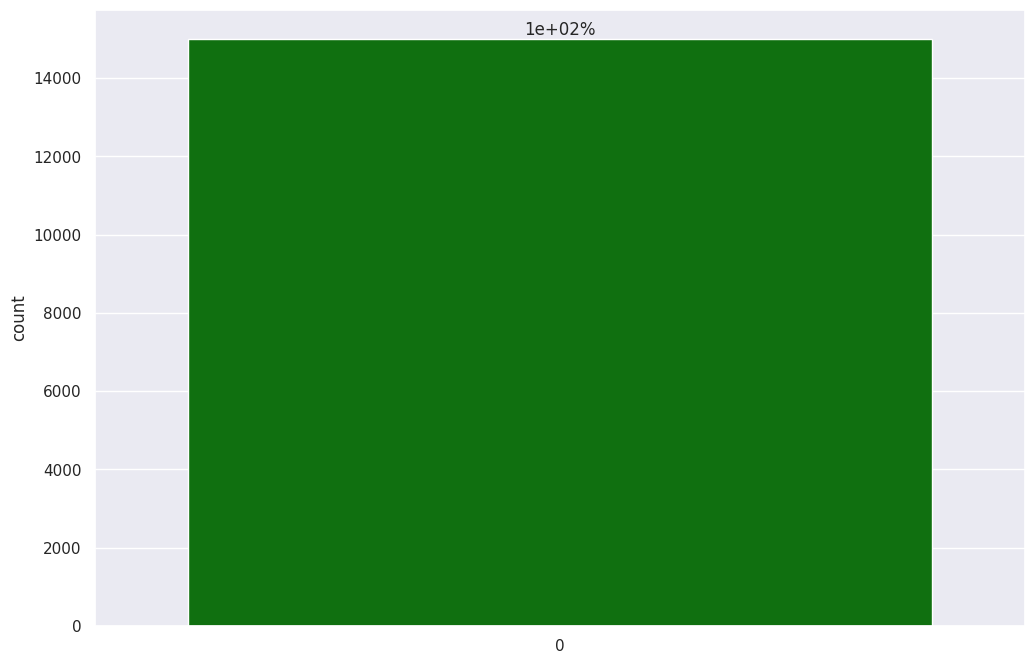

In [68]:
plt.figure(figsize=(12,8))

ax = sns.countplot(df["quit"], color='green')
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]

    y = p.get_bbox().get_points()[1,1]

    ax.annotate('{:.2g}%'.format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
plt.show()

___
**Observations:**
- 76% of employees did not leave the organization while 24% did leave
___

**Which Department of the company has the highest Attrition rate?**

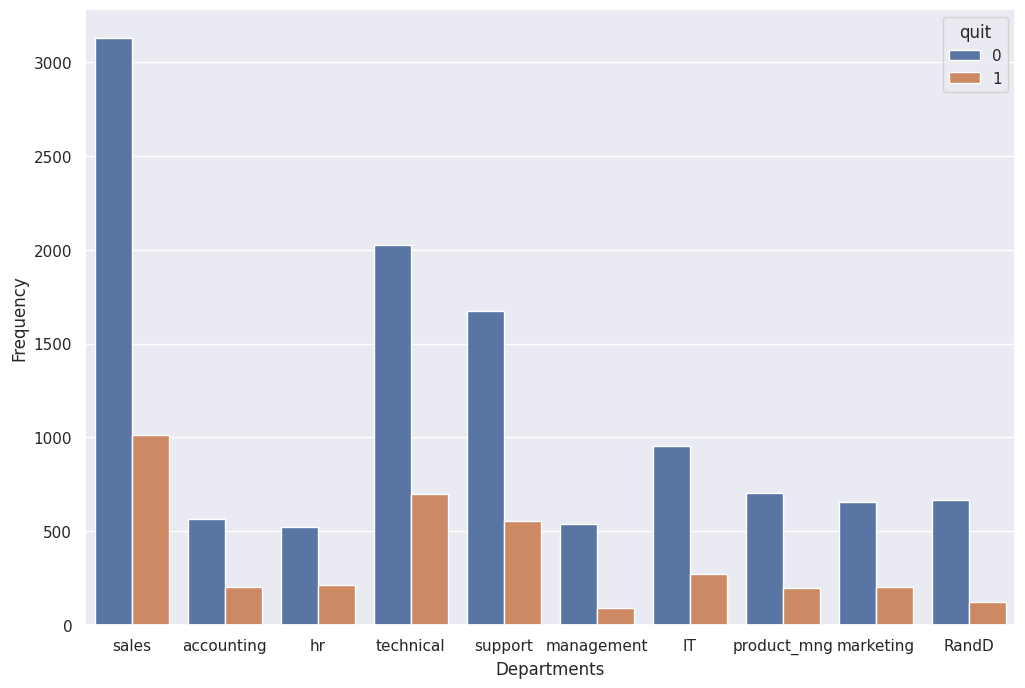

In [69]:
plt.figure(figsize=(12,8))

sns.countplot(data=df,x=df['department'],hue="quit")

plt.xlabel('Departments')
plt.ylabel('Frequency')

plt.show()

___
**Observations:**
- **Sales** department has the highest attrition or turnover rate followed by **technical**, and **support** departments
- **Management** recorded the lowest number of employees leaving the company
___

####**Bi-variate Distributions**
- A Bi-variate distribution is a distribution of two random variables
- The concept generalizes to any number of random variables, giving a **Multivariate Distribution**

**How does salary affect the attrition rate?**

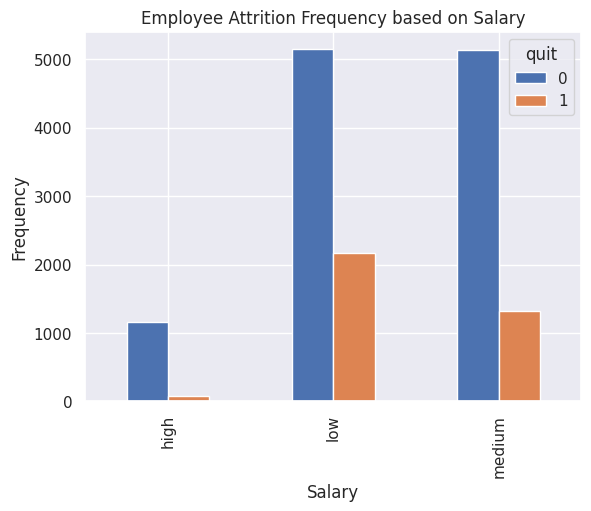

In [70]:
df_new = pd.crosstab(df['salary'], df['quit'])

df_new.plot(kind = 'bar')

plt.title('Employee Attrition Frequency based on Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

___
**Observations:**

- People with **low** salary are more likely to quit as compared to people with **medium** and **high** salaries
- People with **high** salary are very less likely to leave the organization
- Salary seems to be a significant factor in determining the turnover rate in employees
___

**Do experienced employees tend to leave the company if they are not satisfied?**

In [71]:
px.scatter(df, x=df['satisfaction_level'],y=df['time_spend_company'],color=df['quit'])

**Which department executes the most number of projects?**

In [72]:
fig = px.box(df, x="department",y="number_project")
fig.show()

###**Create Training and Testing Set**

In [73]:
X = df.drop('quit', axis = 1)
y = df.quit

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, stratify = y)

###**Data Pre-processing**

####**Encode Categorical Variables**

The dataset contains **2** Categorical Variables:

- **department**
- **salary**

We have to encode them before modelling because scikit learn doesn't accept string data as input

In [75]:
cat_vars = ['department', 'salary']

for vars in cat_vars:
  cat_list = pd.get_dummies(X_train[vars], prefix=vars)
  X_train = X_train.join(cat_list)

In [76]:
cat_vars = ['department', 'salary']

for vars in cat_vars:
  cat_list = pd.get_dummies(X_test[vars], prefix=vars)
  X_test = X_test.join(cat_list)

In [77]:
#Let us drop the department and salary columns

X_train.drop(columns=['department', 'salary'], axis = 1, inplace=True)
X_train.shape

(11999, 20)

In [78]:
X_test.drop(columns=['department', 'salary'], axis = 1, inplace=True)
X_test.shape

(3000, 20)

###**Build an Interactive Decision Tree Model**

[**Click Here!**](https://ipywidgets.readthedocs.io/en/latest/) to learn more about **ipywidgets**

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [80]:
@interact #To convert any function into an inteactive one just write "@interact" immediately before the function definition

def plot_tree(
    crit = ['gini', 'entropy'],
    split = ['best','random'],
    depth = IntSlider(min = 1, max = 25, value =2, continuous_update = False),
    min_split = IntSlider(min = 1, max = 5, value =2, continuous_update = False),
    #min_split is the minimum number of samples  required to split an internal node in our decision tree
    min_leaf = IntSlider(min = 1, max = 5, value =1, continuous_update = False)):

  estimator = DecisionTreeClassifier(criterion=crit,
                                     splitter=split,
                                     max_depth = depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf
                                     )
  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy:', accuracy_score(y_train, estimator.predict(X_train)))
  print('Decision Tree Testing Accuracy:', accuracy_score(y_test, estimator.predict(X_test)))

  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))

  if a > 0.99:
    print('Decision Tree Training Accuracy',a, 'Decision Tree Testing Accuracy', b)
    print('Criterion:',crit,'\n', 'Split:', split,'\n', 'Depth:', depth,'\n', 'Min_split:', min_split,'\n', 'Min_leaf:', min_leaf,'\n')

  #Let us use GraphViz to export the model and display it as an image on the screen
  graph = Source(tree.export_graphviz(estimator, out_file=None,
                                      feature_names = X_train.columns,
                                      class_names = ['stayed', 'quit'],
                                      filled = True))

  display(Image(data=graph.pipe(format = 'png')))


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Advantages** & **Disadvantages** of Decision Tree:

**Advantages:**
- Interpretable and easy to understand
- Can Handle Missing Values
- Feature Selection happens automatically


**Disadvantages:**
- Prone to overfitting
- Tends to add High Variance which means they tend to overfit
- Small changes in data greatly affect prediction




**One problem with Decision Tree is that they have Low Bias and High Variance which means they are prone to overfitting on the training set**



Now, let us see what **Underfit**, **Goodfit**, and **Overfit** is:

- **Underfit**
  - Model has not learned anything
  - **Training Accuracy**: **54%**
  - **Testing Accuracy**: **49%**

- **Overfit**
  - Model has memorized everything
  - **Training Accuracy**: **99%**
  - **Testing Accuracy**: **46%**

- **Goodfit**
  - Model has performed well on the testing data as well alongwith the training data
  - **Training Accuracy**: **93%**
  - **Testing Accuracy**: **91%**



Now, let's use a Random Forest Classifier to overcome the variance problem to get a better generalizable result

###**Build an Interactive Random Forest Model**

In [86]:
@interact
def plot_tree_rf(crit= ['gini','entropy'],
                 depth=IntSlider(min= 1 ,max= 20,value=3, continuous_update=False),
                 forests=IntSlider(min= 1,max= 1000,value= 100,continuous_update=False),
                 min_split=IntSlider(min= 2,max= 5,value= 2, continuous_update=False),
                 min_leaf=IntSlider(min= 1,max= 5,value= 1, continuous_update=False)):

  estimator = RandomForestClassifier(
      random_state = 1,
      criterion = crit,
      n_estimators = forests,
      max_depth = depth,
      min_samples_split = min_split,
      min_samples_leaf = min_leaf,
      n_jobs = -1,
      verbose = False)

  estimator.fit(X_train, y_train)

  print('Random Forest Training Accuracy:', accuracy_score(y_train, estimator.predict(X_train)))
  print('Random Forest Testing Accuracy:', accuracy_score(y_test, estimator.predict(X_test)))

  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))

  if a > 0.99:
    print('Random Forest Training Accuracy',a, 'Random Forest Testing Accuracy', b)
    print('Criterion:',crit,'\n', 'Depth:', depth,'\n', 'forests:', forests,'\n', 'Min_split:', min_split,'\n', 'Min_leaf:', min_leaf,'\n')


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), IntSlider(value…

**Advantages** & **Disadvantages** of Random Forest:

**Advantages:**
- Not prone overfitting
- Runs efficiently huge data sets
- Gives better accuracy than other classification algorithms

**Disadvantages:**
- Computationally Slower
- Found to be biased while dealing with categorical variables
- Although much lower than decision trees, overfitting is still a risk with random forests



###**PyCaret**


Use **PyCaret** to find the best model and perform Automatic Hyperparameter tuning

**NOTE:** It is alwasy used in Industry as a Directional Tool

**PyCaret** is an open source, low-code machine learning library in **Python** that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment

[**Click Here!**](https://pycaret.org/) to learn more about **PyCaret**

**Installing PyCaret**

- !pip install pycaret

####**Tasks to be performed**

- Import PyCaret and load the data set
- Initialize or setup the environment
- Compare Multiple Models and their Accuracy Metrics
- Create the model
- Tune the model
- Evaluate the model


####**Import PyCaret and load the data set**

In [88]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
import pycaret.classification as pc
#dir(pc)

In [91]:
#Loading the dataset
import pandas as pd
df = pd.read_csv('/content/employee_data.csv')

df.head() #Printing the first 5 rows of dataframe

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [92]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

####**Initialize or setup the environment**

In [93]:
pc.setup(df, target='quit')

___
**Observations:**
- The target type (Serial No. 2) is **Binary** because we have two values in **quit** column i.e., **0** and **1**
- The data contains **3** Numeric Features and **6** Categorical Features
___

####**Compare Multiple Models and their Accuracy Metrics**

In [94]:
pc.compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4570, verbose=0, warm_start=False)

**Note:** Don't worry about the models. You are gonna learn most of them in the coming modules

####**Create the Model**



In [95]:
rf_model = pc.create_model('rf') #Performs K-Fold (10) CV for the selected model

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

####**Tune the Model**

In [96]:
tuned_rf = pc.tune_model(rf_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [97]:
print(rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4570, verbose=0, warm_start=False)


In [98]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4570, verbose=0, warm_start=False)


See the difference between the original model (**rf_model**) and the tuned model (**tuned_rf**)

####**Evaluate the Model**

In [99]:
tuned_rf_eval = pc.evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…